##

::: {.notes}
Hey there! Imagine you're driving to work every day. Some days, you zip through traffic without a hitch. Other days, you get stuck in jams or hit every red light. Now, think of the ups and downs of your drive as return volatility in the stock market.
:::

:::{.absolute top=75 left=200 width=350 height=100}
$$
\sigma = \sqrt{\frac{\sum_{i=1}^{n}(R_i - \mu)^2}{n-1}}
$$
:::


:::{.absolute top=250 left=100 width=600 height=400}
  
:::{.incremental .smaller}
1. Calculate the average return ($\mu$).
2. Subtract the average return from each individual return $R_{i} - \mu$.
3. Square these differences.
4. Sum up all the squared differences.
5. Divide by the number of returns minus one ($n-1$).
6. Take the square root of the result. 
 
:::
:::


##


In [8]:
%%capture
### Example Code:
import yfinance as yf
import numpy as np

# Get historical data
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
returns = data['Adj Close'].pct_change().dropna()

# Calculate average return
mu = np.mean(returns)

# Calculate squared differences from the mean
squared_diff = (returns - mu) ** 2

# Calculate variance
variance = np.sum(squared_diff) / (len(returns) - 1)

# Calculate volatility
volatility = np.sqrt(variance)

print("Volatility:", volatility)


In [9]:
%%capture

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Fetch historical data for Apple
data = yf.download('AAPL', start='2022-01-01', end='2023-12-31')
returns = data['Adj Close'].pct_change().dropna()

# Calculate the moving average volatility
window = 63  # 21 trading days in a month 
rolling_volatility = returns.rolling(window=window).std() * np.sqrt(260)



## 

:::{.absolute top="10" left="10" width="900" height="900"}

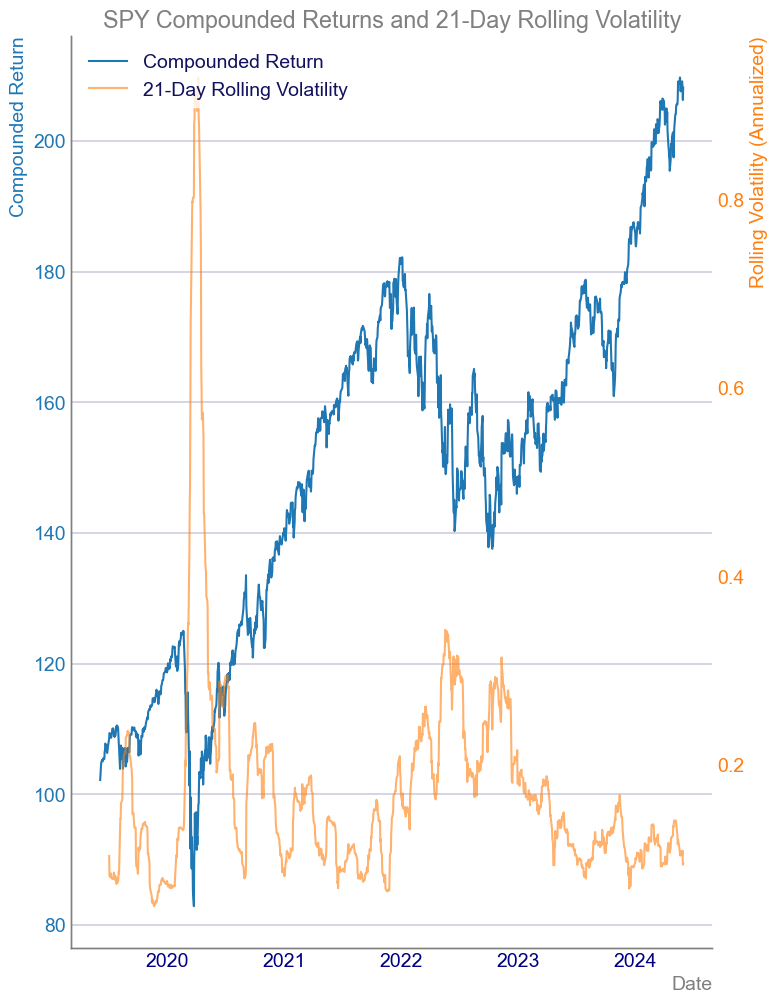

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetching the SPY data
spy = yf.Ticker("SPY")
data = spy.history(period="5y")

# Calculating daily returns
data['Daily Return'] = data['Close'].pct_change()

# Calculating compounded returns normalized to 100 at inception
data['Compounded Return'] = (1 + data['Daily Return']).cumprod() * 100

# Calculating 21-day rolling window annualized volatility
data['Rolling Volatility'] = data['Daily Return'].rolling(window=21).std() * np.sqrt(252)

plt.style.use('ddm-chart.mplstyle')
# Plotting the compounded returns and rolling volatility
fig, ax1 = plt.subplots()

# Plotting Compounded Returns
ax1.set_xlabel('Date')
ax1.set_ylabel('Compounded Return', color='tab:blue')
ax1.plot(data.index, data['Compounded Return'], color='tab:blue', label='Compounded Return')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plotting Rolling Volatility
ax2 = ax1.twinx()
ax2.set_ylabel('Rolling Volatility (Annualized)', color='tab:orange')
ax2.plot(data.index, data['Rolling Volatility'], color='tab:orange', alpha=0.6, label='21-Day Rolling Volatility')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('SPY Compounded Returns and 21-Day Rolling Volatility')
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
plt.grid()
plt.show()


:::
